# Part 1
This part is concerned with loading images and displaying them.

## Problem 1
### Loading the images
First we want to load the images into a numpy array. Before we do that, let's set up some imports and paths.


In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from PIL import Image

folder_path = "toyProblem_F22"

### Load into a NumPy array
We then want to store the data in a NumPy array.
Along the way we are tasked to convert to grayscale and normalise to the range [0, 1].

In [11]:
image_files = sorted([f for f in os.listdir(folder_path)])

num_images = len(image_files)
image_shape = (256, 256)
image_sequence = np.zeros((num_images, *image_shape), dtype=np.float32)

for i, file in enumerate(image_files):
    img_path = os.path.join(folder_path, file)
    img = Image.open(img_path).convert("L") # this converts to grayscale
    img_array = np.array(img, dtype=np.float32) / 255.0 # this normalises to [0, 1]
    image_sequence[i] = img_array

### Showing the images
We then want to show the images. We do this by showing each image and adding a delay of 0.1 seconds, clearing the frame and restarting.

In [ ]:
plt.figure()
for frame in range(num_images):
    plt.imshow(image_sequence[frame], cmap="gray")
    plt.title(f"Frame {frame+1}/{num_images}")
    plt.axis("off")
    plt.pause(0.1)
    plt.clf()

plt.close()

# Part 2
This part is concerned with image gradients.

## Problem 2.1
### Low level gradient calculation
We can use the simple low level gradient calculation to calculate the gradients of the images.

In [13]:
V_x = image_sequence[:, :, 1:] - image_sequence[:, :, :-1]
V_y = image_sequence[:, 1:, :] - image_sequence[:, :-1, :]
V_t = image_sequence[1:, :, :] - image_sequence[:-1, :, :]

### Showing the gradients of a selected frame
We can show the gradients of a selected frame by showing the gradients of the frame.

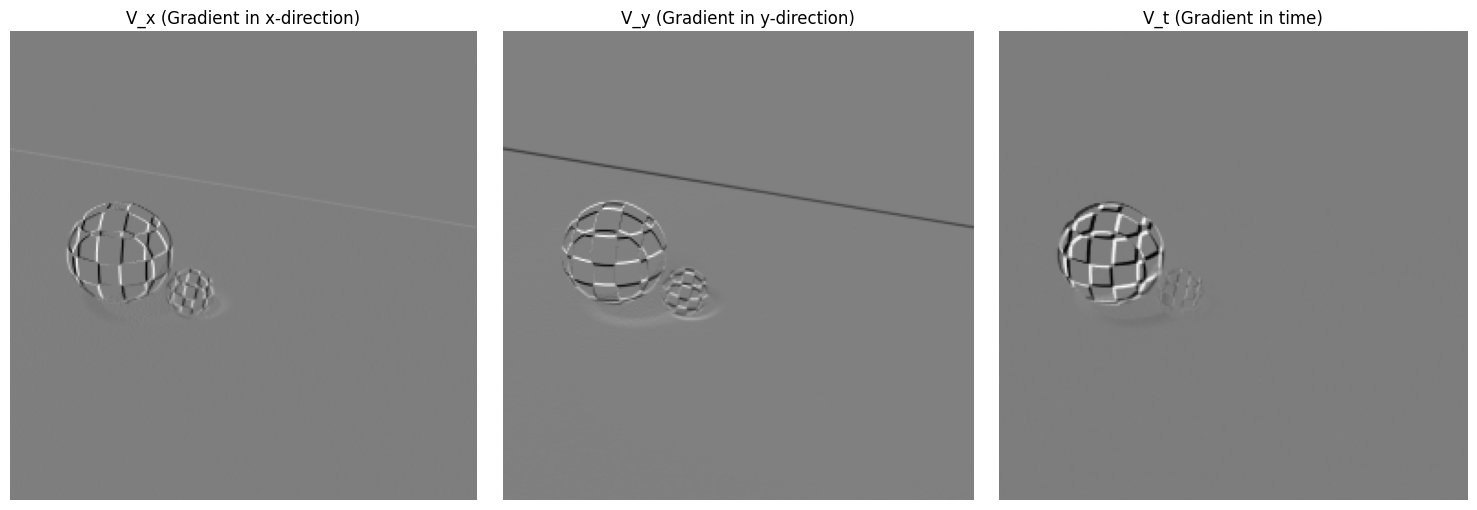

In [14]:
selected_frame = 10 # we select the 11th frame for no particular reason
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(V_x[selected_frame], cmap="gray")
plt.title("V_x (Gradient in x-direction)")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(V_y[selected_frame], cmap="gray")
plt.title("V_y (Gradient in y-direction)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(V_t[selected_frame], cmap="gray")
plt.title("V_t (Gradient in time)")
plt.axis("off")

plt.tight_layout()
plt.show()

### Observations of the gradients
We observe that the gradients are split between the x, y and t directions
- The x gradient shows the changes in the vertical direction
- The y gradient shows the changes in the horizontal direction
- The t gradient shows the regions where motion occurs between frames

## Problem 2.2
### Simple gradient filters
We want to use prewitt and sobel kernels to calculate the gradients. Let's define these kernels - they can be found [here](https://www.projectrhea.org/rhea/index.php/An_Implementation_of_Sobel_Edge_Detection).

In [15]:
prewitt_x = np.array([[-1, 0, 1],
                      [-1, 0, 1],
                      [-1, 0, 1]])

prewitt_y = np.array([[-1, -1, -1],
                      [0, 0, 0],
                      [1, 1, 1]])

sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

#### Convolution with the kernels
We can then convolve the kernels with the images to get the gradients.

In [16]:
V_x_prewitt = convolve(image_sequence, prewitt_x[np.newaxis, :, :], mode="constant")
V_y_prewitt = convolve(image_sequence, prewitt_y[np.newaxis, :, :], mode="constant")

V_x_sobel = convolve(image_sequence, sobel_x[np.newaxis, :, :], mode="constant")
V_y_sobel = convolve(image_sequence, sobel_y[np.newaxis, :, :], mode="constant")

### Showing the gradients of a selected frame
We can show the gradients of a selected frame by showing the gradients of the frame.
We use the scipy.ndimage.convolve function to convolve the image with the kernel. Documentation can be found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html).

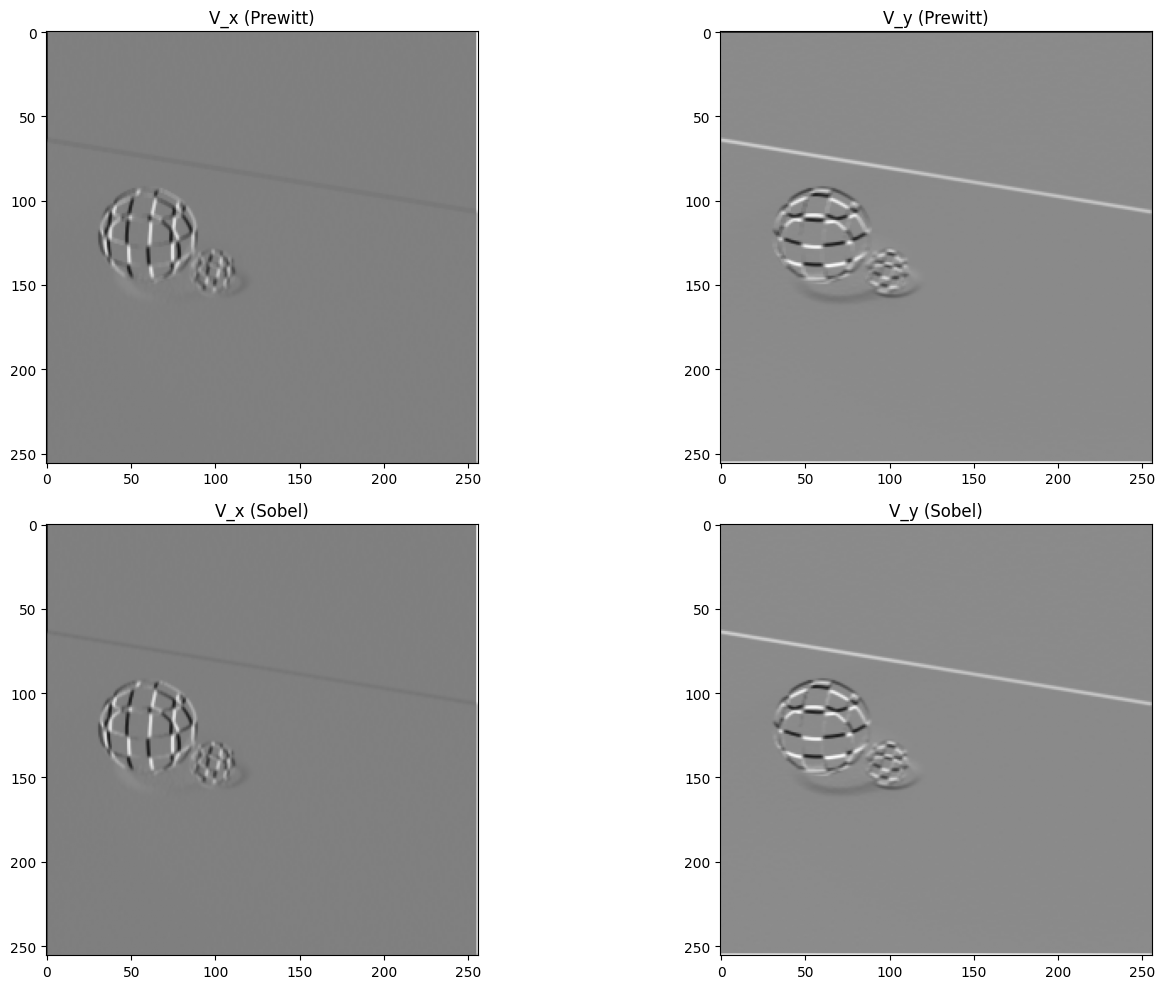

In [17]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(V_x_prewitt[selected_frame], cmap="gray")
plt.title("V_x (Prewitt)")

plt.subplot(2, 2, 2)
plt.imshow(V_y_prewitt[selected_frame], cmap="gray")
plt.title("V_y (Prewitt)")

plt.subplot(2, 2, 3)
plt.imshow(V_x_sobel[selected_frame], cmap="gray")
plt.title("V_x (Sobel)")

plt.subplot(2, 2, 4)
plt.imshow(V_y_sobel[selected_frame], cmap="gray")
plt.title("V_y (Sobel)")

plt.tight_layout()
plt.show()

I think we should not keep these, since scipy convolve already handles flipping for us.

### Flipping the kernels and plotting again

### Image Filtering